## K Means Image Segmentation (Compression)

This notebook serves as a demonstration on image segmentation using KMeans clustering algorithm. The technique is applied on a pink spotted cattleheart butterfly photo which was obtained from <a href=https://pixabay.com>Pixabay</a> website uploaded by <a href=https://pixabay.com/photos/pink-spotted-cattleheart-butterfly-5762929/>Aldarami.<a/>

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

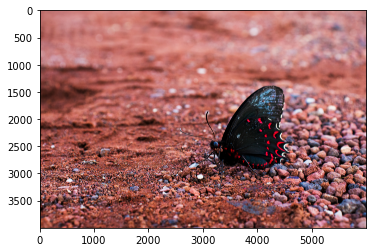

In [2]:
# Import the image
pink_spotted_cattleheart = plt.imread("pink-spotted-cattleheart-5762929.jpg")

plt.imshow(pink_spotted_cattleheart)
plt.show()

In [3]:
# Check the shape of the image
pink_spotted_cattleheart.shape

(4000, 6000, 3)

The image is 4000 by 6000 pixels.

**Reshape the image**

In [4]:
data = pink_spotted_cattleheart / 255
data = data.reshape(4000 * 6000, 3)
data.shape

(24000000, 3)

**Create the function that plot the distribution of color pixels of the image**

In [5]:
# The fuction randomly picks 20000 color points from the data
# It then plots Red against Green and plots Red against Blue

def plot_pixels(data, title, colors=None, N=20000):
    if colors is None:
        colors = data
        
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='+')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    
    ax[1].scatter(R, B, color=colors, marker='+')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    
    fig.suptitle(title, size=20)

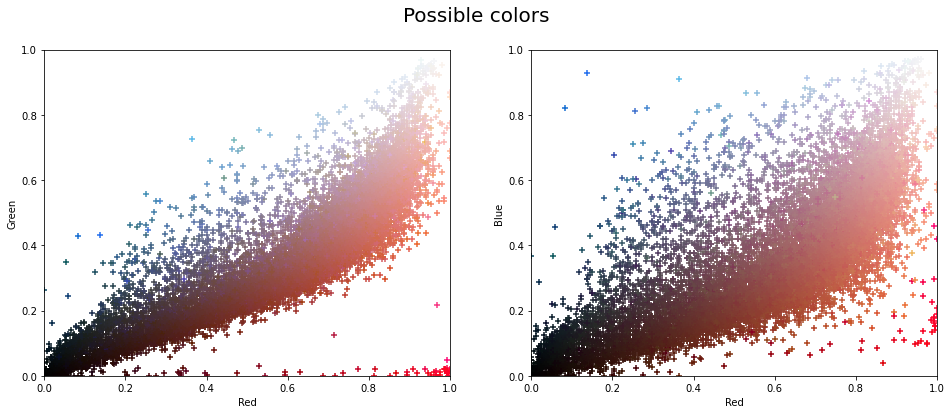

In [6]:
plot_pixels(data, title="Possible colors")

The plot on the *left* depicts the distribution of colors in the Red and Green color channels while the one on the *right* is the distribution of colors in the Red and Blue color channels. If you look close enough there a few pink/red like data points at the bottom right corner of the left plot which are could be representing the pink/red spots on the butterfly wings. These points also appear on the plot on the right.

### Using K Means for image segmentation/compression

In [7]:
import warnings; warnings.simplefilter('ignore')
from sklearn.cluster import MiniBatchKMeans

#plot_pixels(data, colors=new_colors, title="Reduced color space")

# Using kmeans to partition the image into n mutliple segments: n clusters

def k_means_clusters(data, clusters):
    kmeans = MiniBatchKMeans(clusters)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.labels_]
    return new_colors

two_colors = k_means_clusters(data, 2) # 2 color segments
four_colors = k_means_clusters(data, 4) # 4 color segments
six_colors = k_means_clusters(data, 6) # 6 color segments
eight_colors = k_means_clusters(data, 8) # 8 color segments
twelve_colors = k_means_clusters(data, 12) # 12 color segments

Text(0.5, 1.0, '2 Color Image')

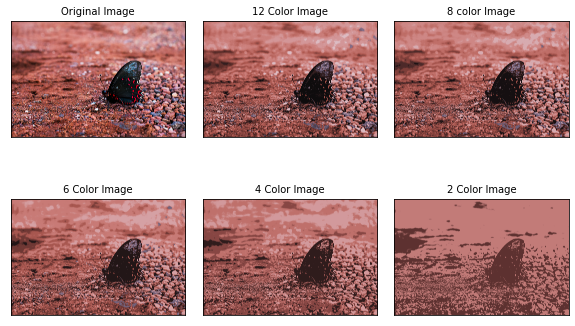

In [14]:
# reshape back to the original image 
two_colors = two_colors.reshape(pink_spotted_cattleheart.shape)
four_colors = four_colors.reshape(pink_spotted_cattleheart.shape)
six_colors = six_colors.reshape(pink_spotted_cattleheart.shape)
eight_colors = eight_colors.reshape(pink_spotted_cattleheart.shape)
twelve_colors = twelve_colors.reshape(pink_spotted_cattleheart.shape)

fig, ax= plt.subplots(2, 3, figsize=(10, 6),
                     subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.1)
ax[0][0].imshow(pink_spotted_cattleheart)
ax[0][0].set_title("Original Image", size=10)
ax[0][1].imshow(twelve_colors)
ax[0][1].set_title("12 Color Image", size=10)
ax[0][2].imshow(eight_colors)
ax[0][2].set_title("8 color Image", size=10)
ax[1][0].imshow(six_colors)
ax[1][0].set_title("6 Color Image", size=10)
ax[1][1].imshow(four_colors)
ax[1][1].set_title("4 Color Image", size=10)
ax[1][2].imshow(two_colors)
ax[1][2].set_title("2 Color Image", size=10)

The plots above shows how KMeans can affect the image. As we can see from the 12 color image up to the 2 color image, the image color quality was decreasing with respect to the number of clusters applied to K Means when training the model.

In [12]:
# Saving the compressed images

plt.imsave("2_Color_image.jpg", two_colors)
plt.imsave("4_Color_image.jpg", four_colors)
plt.imsave("6_Color_image.jpg", six_colors)
plt.imsave("8_Color_image.jpg", eight_colors)
plt.imsave("12_Color_image.jpg", twelve_colors)

After saving these compressed images we can clearly see that their sizes have also reduced.